In [2]:
import os

#importing libraries
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
from scipy import stats

#importing visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#Reading Data
df = pd.read_csv('./Raw/train.csv', parse_dates=['date'])
display(df)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [4]:
df.groupby(["store", "item"]).agg({"sales": ["sum", "mean", "median", "std"]})

sales                             
               sum       mean median        std
store item                                     
1     1      36468  19.971522   19.0   6.741022
      2      97050  53.148959   52.0  15.005779
      3      60638  33.208105   33.0  10.072529
      4      36440  19.956188   20.0   6.640618
      5      30335  16.612815   16.0   5.672102
...            ...        ...    ...        ...
10    46    120601  66.046550   65.0  18.114991
      47     45204  24.755750   24.0   7.924820
      48    105570  57.814896   57.0  15.898538
      49     60317  33.032311   32.0  10.091610
      50    135192  74.037240   73.0  19.937566

[500 rows x 4 columns]

<h2>Explore distribution of individual item sales

<AxesSubplot:xlabel='item', ylabel='sales'>

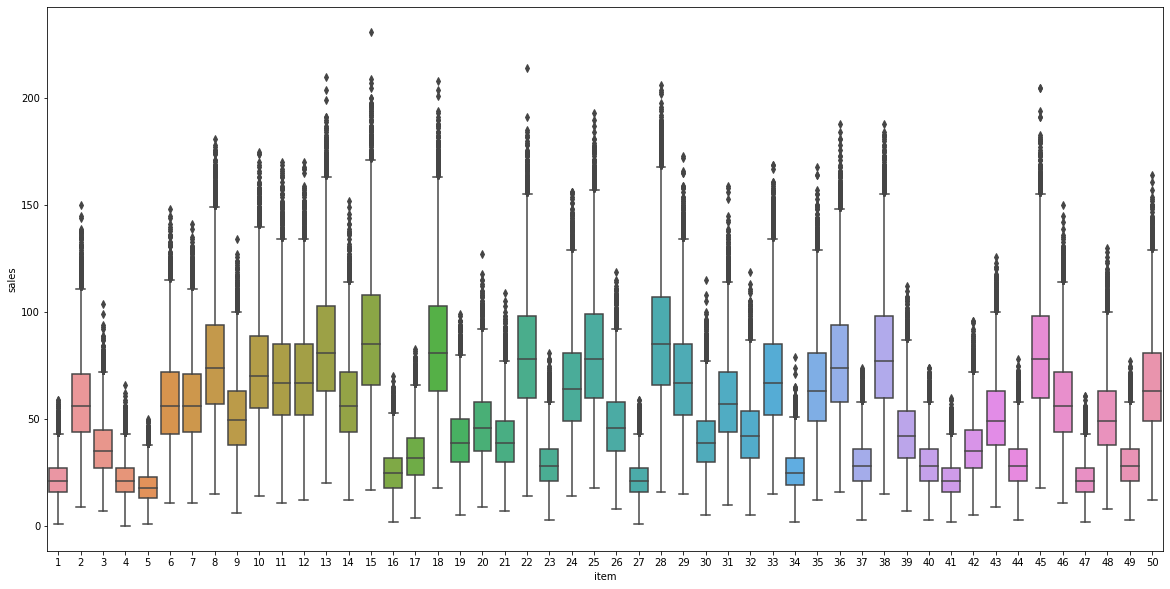

In [5]:
plt.figure(figsize = (20,10))
sns.boxplot(x="item", y="sales", data=df)

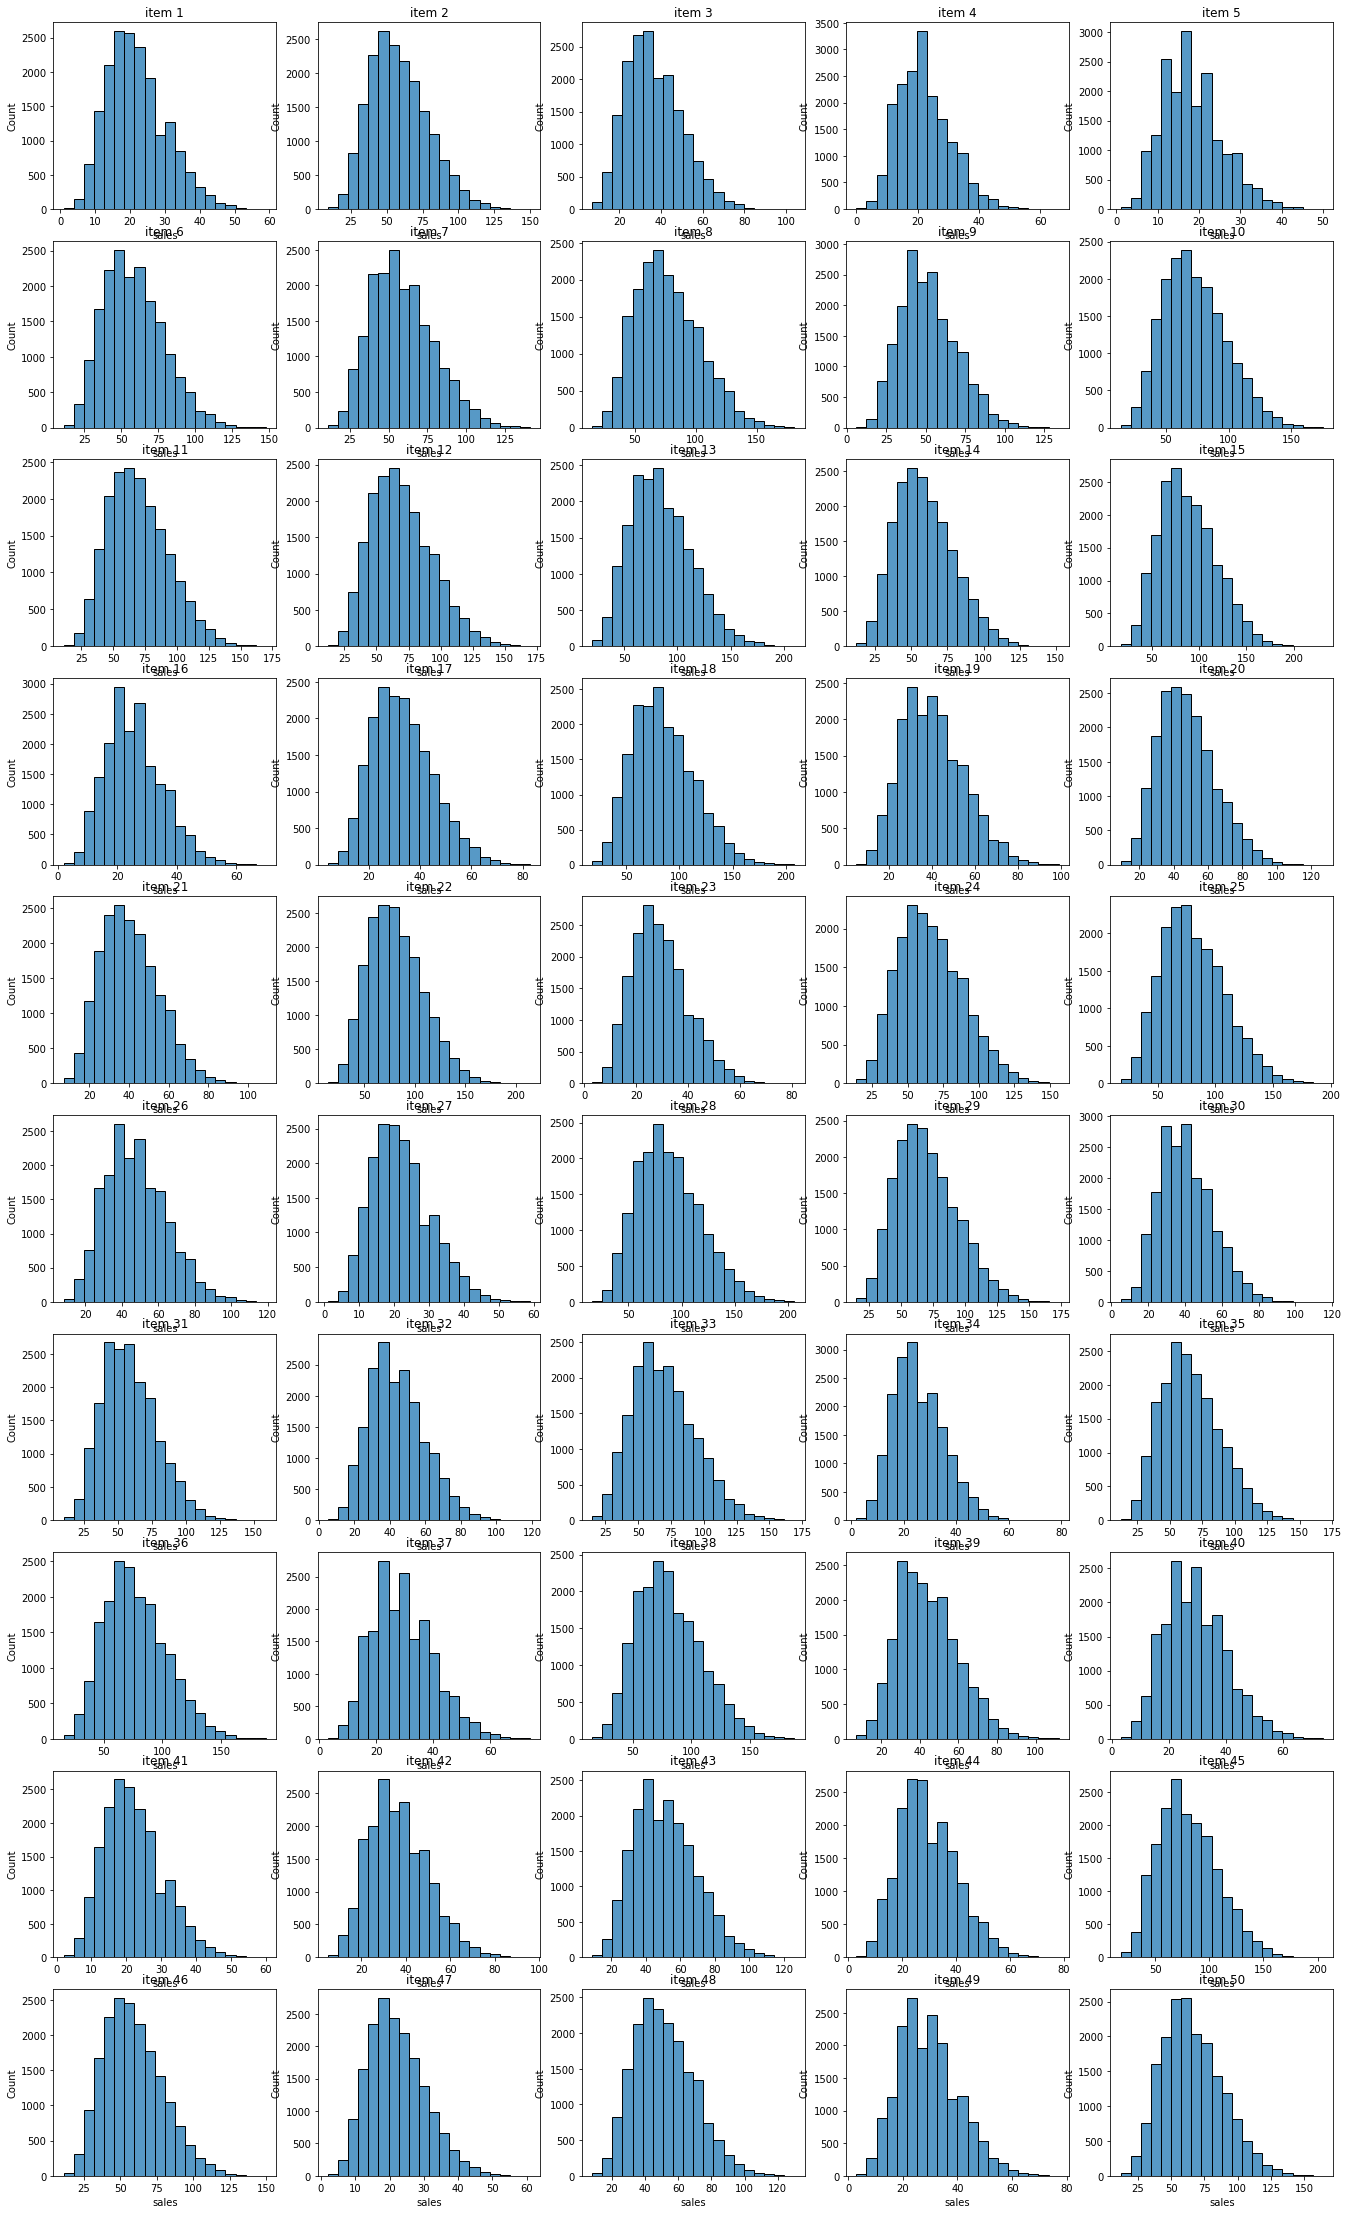

In [6]:
fig, axes = plt.subplots(ncols=5, nrows=10)
fig.set_size_inches(18.5, 30.5)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

for i, ax in zip(df["item"].unique(), axes.flat):
    newdf = df[df["item"] == i]
    sns.histplot( x="sales", data=newdf,  ax=ax, bins=20)
    ax.set_title("item " + str(i))
plt.show()

<h2>Explore distribution of individual store sales

<AxesSubplot:xlabel='store', ylabel='sales'>

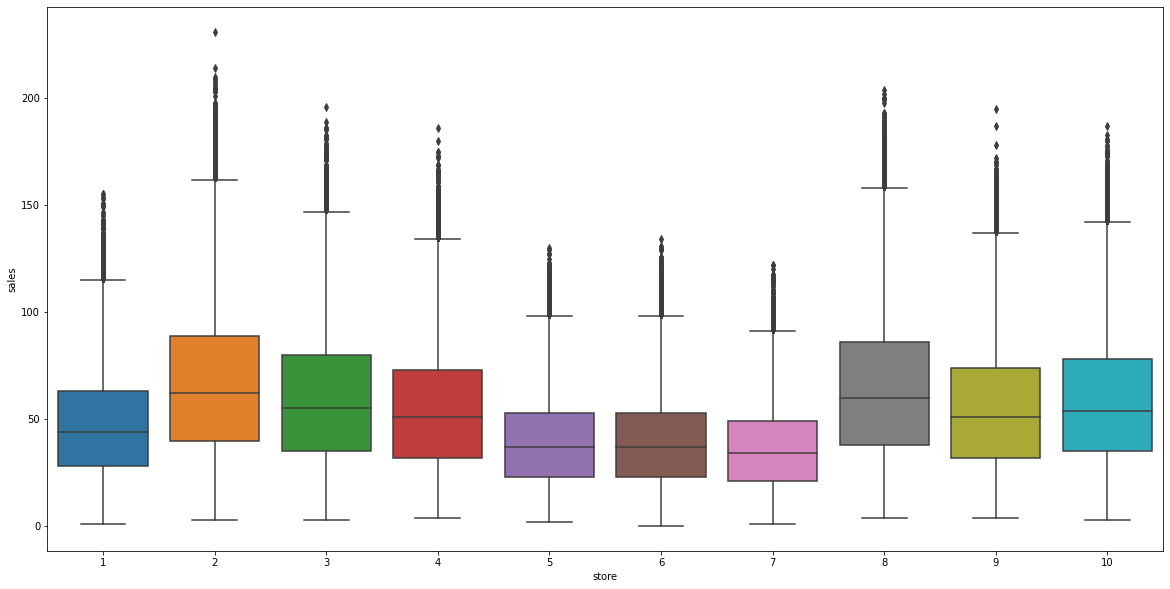

In [7]:
plt.figure(figsize = (20,10))
sns.boxplot(x="store", y="sales", data=df)

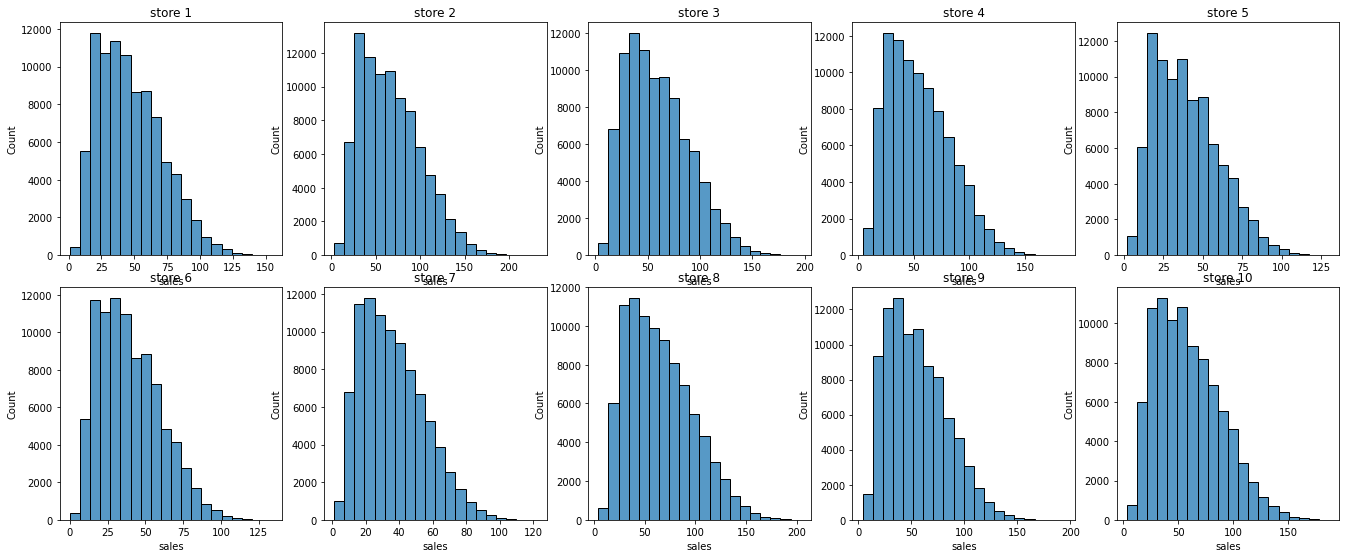

In [8]:
fig, axes = plt.subplots(ncols=5, nrows=2)
fig.set_size_inches(18.5, 7.5)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

for i, ax in zip(df["store"].unique(), axes.flat):
    newdf = df[df["store"] == i]
    sns.histplot( x="sales", data=newdf,  ax=ax, bins=20)
    ax.set_title("store " + str(i))
plt.show()

In [11]:

dflist = list()

for i in df["store"].unique():
    newdf = df[df["store"] == i].copy()
    newSeries = newdf["sales"]
    #generate a dict of series of sales
    percentileSeries = newSeries.tolist()
    newdf["store_raw_percentile"] = newdf["sales"].map(lambda x : stats.percentileofscore(percentileSeries,x))
    dflist.append(newdf) 
    
generateddf = pd.concat(dflist)


#newdf = df[df["store"] == 1].copy()
# newSeries = newdf["sales"]
# #generate a dict of series of sales
# percentileSeries = newSeries.tolist()


# newdf["store_raw_percentile"] = newdf["sales"].map(lambda x : stats.percentileofscore(percentileSeries,x))
# print(newdf)


# test= pd.DataFrame({"sales":[0,34,54]})
# test["store_raw_percentile"] = test["sales"].map(lambda x : stats.percentileofscore(percentileSeries,x))
# print(test)
